<h1><i>Лабораторная работа №2</i></h1>
<h3>Деревья решений</h3>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from io import StringIO
from IPython.display import Image
from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold

In [99]:
df_train = pd.read_csv('winequality-red.csv', sep=';')
df_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [78]:
df_train[df_train['quality'].isnull()].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [79]:
df_test = df_train.copy()

In [80]:
df_test = df_test.drop(['pH', 'sulphates'], axis=1)

In [81]:
model = DecisionTreeClassifier(random_state=123)

In [82]:
X, Y = df_train.iloc[:,:-1].values, df_train.iloc[:,-1].values

<h2>Обучение модели</h2>

In [83]:
model = model.fit(X,Y)

In [84]:
model.predict([[6, 0.580, 0.29, 3.9, 0.198, 39.0, 102.0, 0.94680, 3.33, 0.82, 11]])

array([7], dtype=int64)

In [85]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [86]:
train_scores, valid_scores = validation_curve(model, X, Y, 'max_depth', range(1,10), cv=cv, scoring='f1_micro')

In [87]:
train_scores.shape

(9, 5)

In [88]:
valid_scores.shape

(9, 5)

In [89]:
type(train_scores)

numpy.ndarray

Text(0,0.5,'f1_micro')

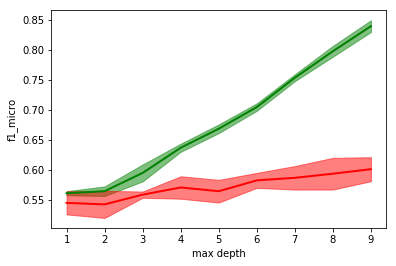

In [90]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='g',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='g', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('f1_micro')

In [91]:
train_scores, valid_scores = validation_curve(model, X, Y, 'max_depth', range(1,10), cv=cv, scoring='homogeneity_score')

Text(0,0.5,'homogeneity_score')

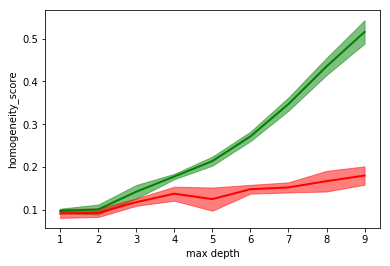

In [92]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='g',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='g', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('homogeneity_score')

In [93]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, None],
    'min_samples_leaf': randint(1, 13),
    'class_weight': [None, 'balanced'],
    'min_samples_split': randint(2,18)
}

cv = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)

model = DecisionTreeClassifier(random_state=1)

random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=300, n_jobs=-1,
                                   cv=cv, scoring='f1_micro', random_state=3)

random_search.fit(X, Y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          fit_params=None, iid=True, n_iter=300, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [3, None], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000B446978>, 'class_weight': [None, 'balanced'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000B446208>},
          pre_dispatch='2*n_jobs', random_state=3, refit=True,
          return_train_score='warn', scoring='f1_micro', verbose=0)

In [94]:
random_search.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [95]:
random_search.best_score_

0.6272670419011882

In [96]:
model = random_search.best_estimator_
imp = model.feature_importances_

In [97]:
pd.Series(index=df_train.columns[:-1], data = imp).sort_values()

free sulfur dioxide     0.056736
citric acid             0.059777
fixed acidity           0.062131
chlorides               0.065704
density                 0.074911
pH                      0.085345
residual sugar          0.087219
volatile acidity        0.098640
total sulfur dioxide    0.107667
sulphates               0.127024
alcohol                 0.174847
dtype: float64